# Modelling

In [84]:
#Importing all the libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### LINEAR REGRESSION

In [34]:
# Load the CameraAccessoryWeeklyFinal.csv file which is generated by eda part.
CameraAccessoryWeekly=pd.read_csv('CameraAccessoryWeeklyFinal.csv')

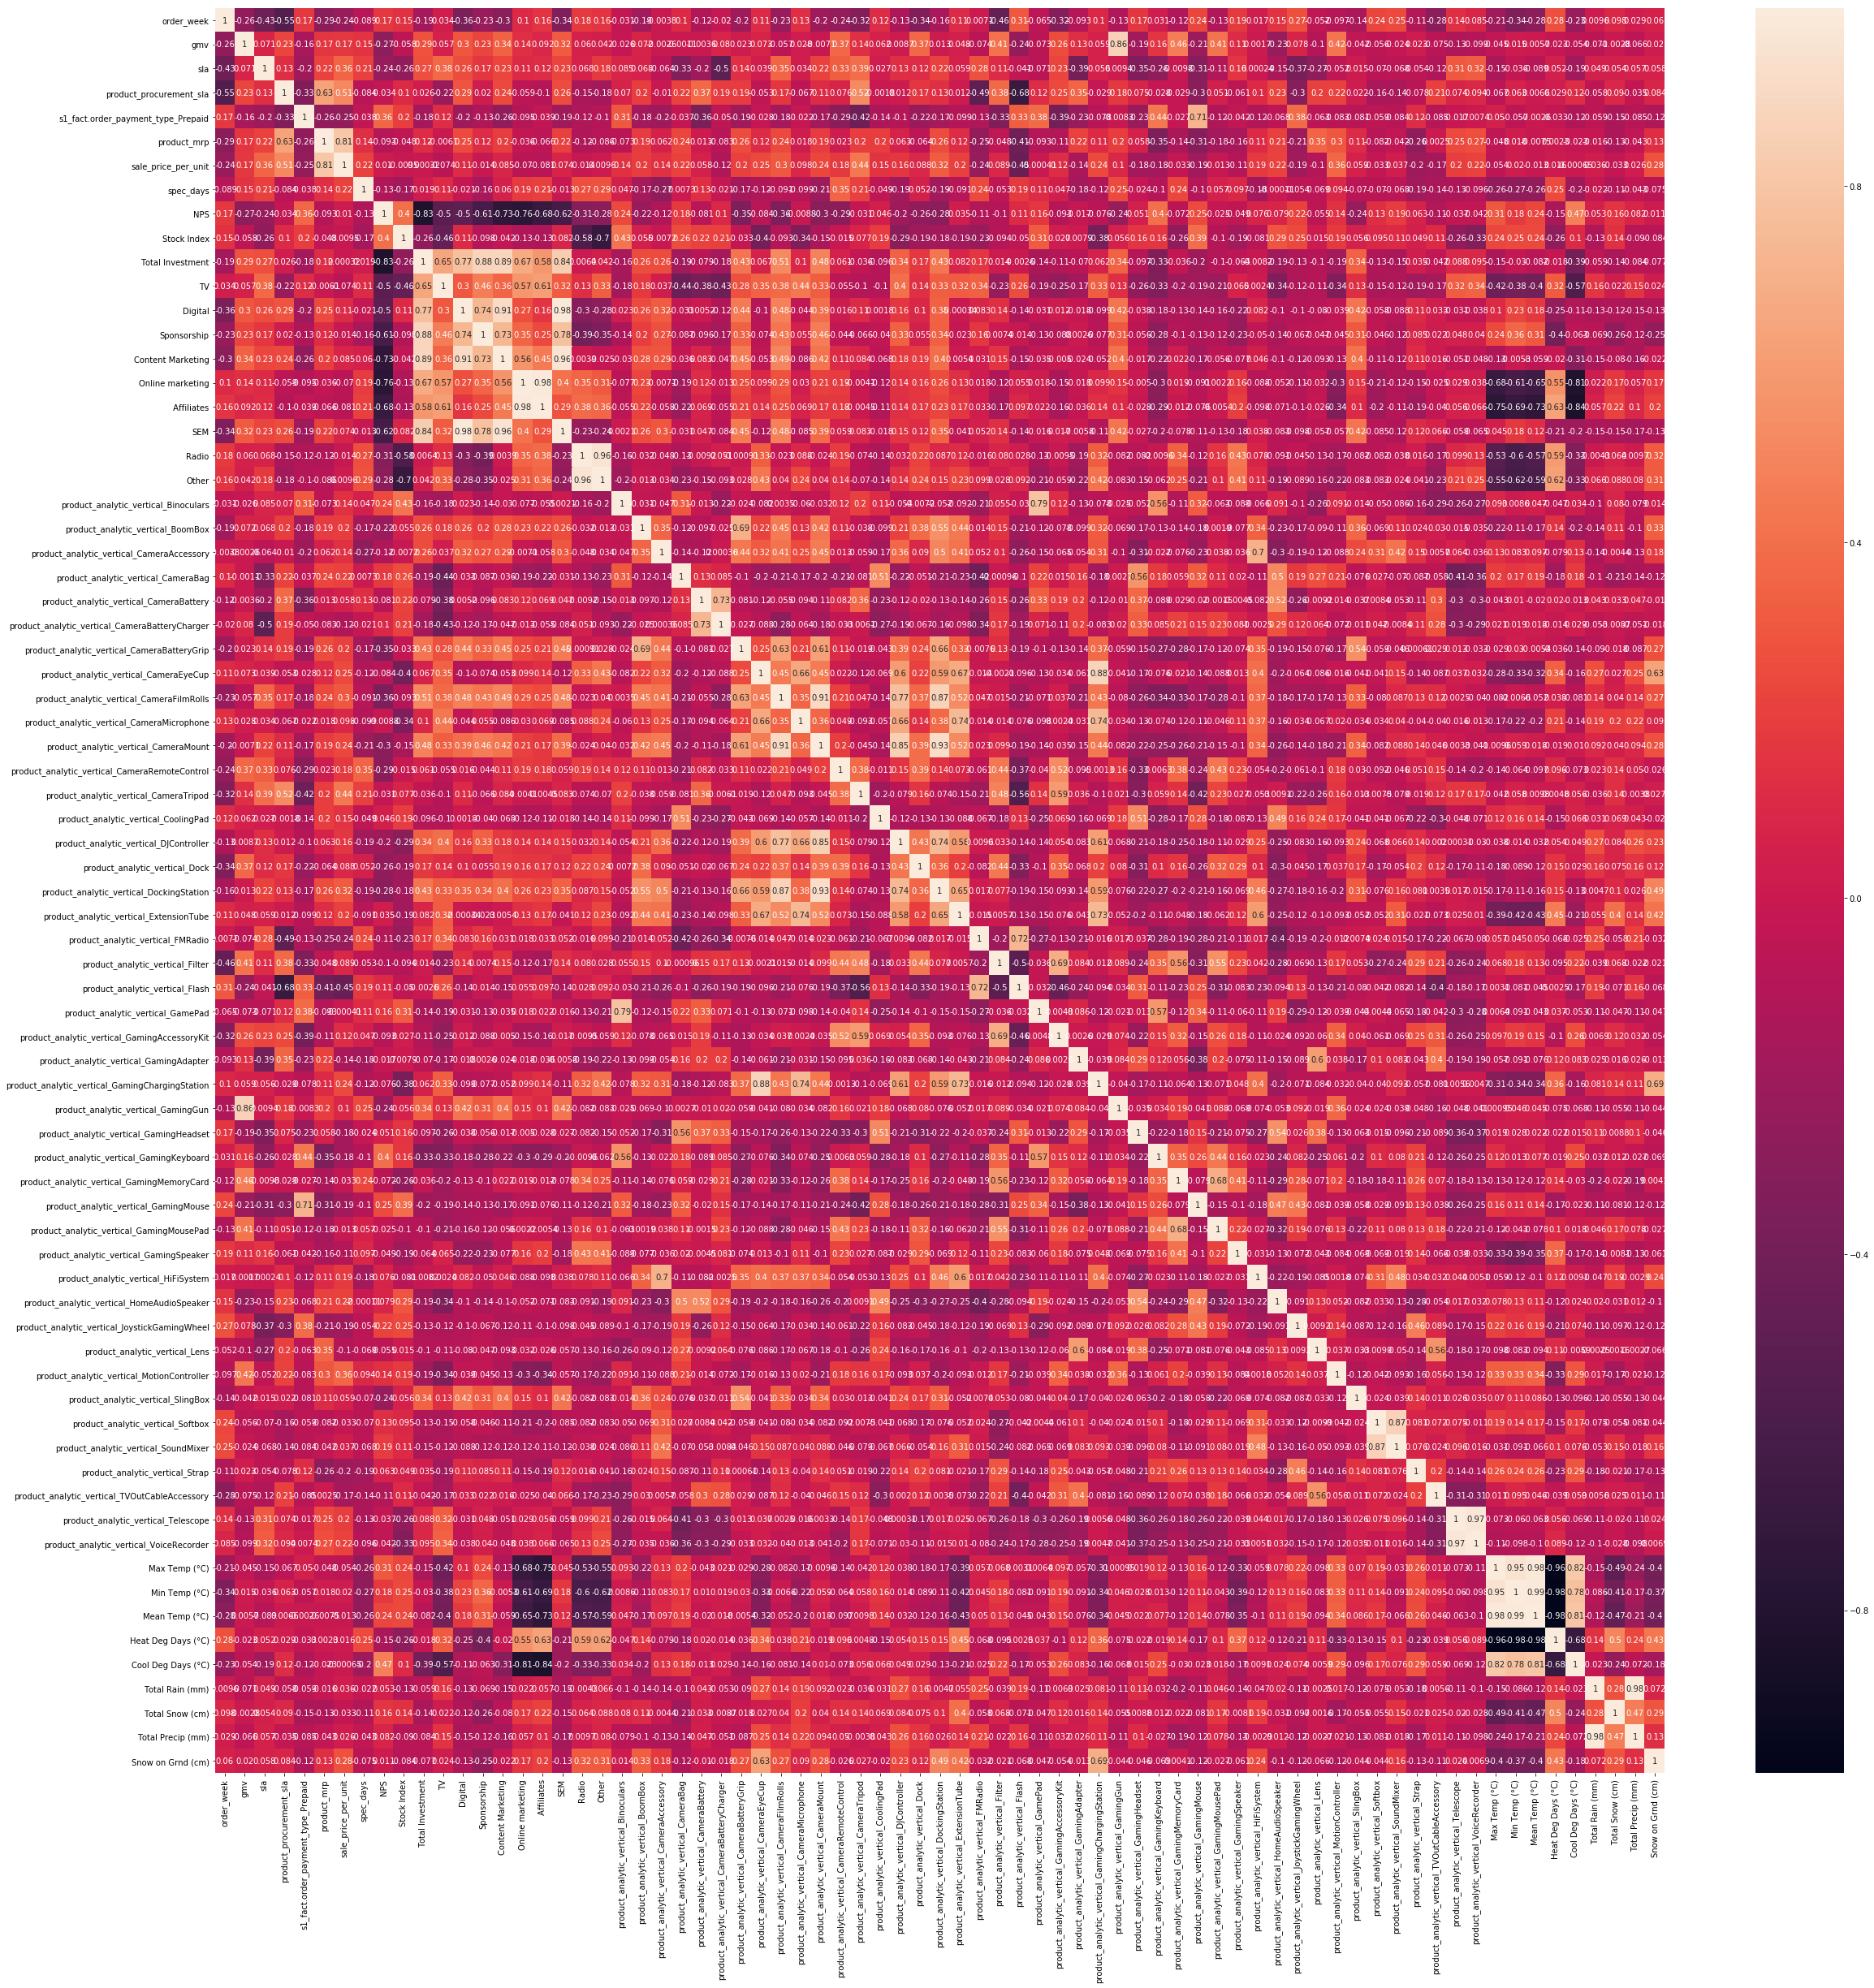

In [35]:
#Try to visulise it.
plt.figure(figsize=(40,40))
sns.heatmap(CameraAccessoryWeekly.corr(), annot=True)
plt.show()

In [36]:
#Using the above heat map, its difficult to remove multicollinearty
# so we will be doing VIF check and RFE
#checking basic info of dataframe
CameraAccessoryWeekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 73 columns):
order_week                                         53 non-null float64
gmv                                                43 non-null float64
sla                                                43 non-null float64
product_procurement_sla                            43 non-null float64
s1_fact.order_payment_type_Prepaid                 43 non-null float64
product_mrp                                        43 non-null float64
sale_price_per_unit                                43 non-null float64
spec_days                                          43 non-null float64
NPS                                                43 non-null float64
Stock Index                                        43 non-null float64
Total Investment                                   43 non-null float64
TV                                                 43 non-null float64
Digital                                      

In [37]:
# removing the Nan from final 
CameraAccessoryWeekly_f=CameraAccessoryWeekly[CameraAccessoryWeekly.gmv.isnull() ==False]

In [38]:
CameraAccessoryWeekly_f.shape

(43, 73)

In [39]:
# divide data into train and test
df_train,df_test = train_test_split(CameraAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [40]:
# Standardise the data
scaler = StandardScaler()
scaler.fit(CameraAccessoryWeekly_f)

# divide data into train and test
df_train,df_test = train_test_split(CameraAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [41]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

##### Using Grid Serach CV to tune feature hyperparameter

In [42]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [43]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074999,0.013434,0.000401,0.000492,1,{'n_features_to_select': 1},-0.108800,-2.877147,-1.915974,-0.016774,...,-1.000648,1.179976,1,0.838210,0.274411,0.175722,0.862959,0.125387,0.455338,0.326353
1,0.046798,0.004953,0.000200,0.000399,2,{'n_features_to_select': 2},-4.306670,-3.029770,-6.020274,-1.433903,...,-3.046006,1.991432,2,0.935229,0.367887,0.315498,0.910085,0.233814,0.552502,0.305340
2,0.044000,0.001265,0.000000,0.000000,3,{'n_features_to_select': 3},-4.460713,-4.139572,-15.975442,-1.944737,...,-5.426889,5.461724,4,0.937075,0.386114,0.486425,0.929132,0.455990,0.638947,0.242383
3,0.043799,0.002315,0.000199,0.000399,4,{'n_features_to_select': 4},-3.897344,-5.325023,-14.184357,-1.986981,...,-5.172495,4.798656,3,0.969313,0.397517,0.539084,0.929185,0.573213,0.681662,0.226645
4,0.044999,0.002608,0.000400,0.000490,5,{'n_features_to_select': 5},-4.321580,-6.167555,-14.713418,-2.199857,...,-5.568496,4.963704,5,0.970574,0.403079,0.541547,0.937217,0.629350,0.696354,0.222565
5,0.046599,0.004129,0.000400,0.000490,6,{'n_features_to_select': 6},-3.307813,-6.131971,-20.277666,-2.266511,...,-6.490748,7.133514,6,0.974798,0.449460,0.582220,0.937217,0.634139,0.715567,0.205696
6,0.042397,0.001497,0.000400,0.000490,7,{'n_features_to_select': 7},-3.175627,-7.606957,-20.352587,-21.964160,...,-10.738199,8.813717,8,0.977454,0.457486,0.595867,0.962820,0.684344,0.735594,0.204755
7,0.041998,0.001673,0.000400,0.000490,8,{'n_features_to_select': 8},-2.529037,-12.072242,-20.778579,-14.222281,...,-9.997764,7.570083,7,0.978964,0.474168,0.597467,0.964536,0.738615,0.750750,0.198961
8,0.043399,0.002417,0.000201,0.000402,9,{'n_features_to_select': 9},-2.271606,-12.640027,-23.509402,-25.182514,...,-12.816540,10.302354,9,0.980052,0.478657,0.625509,0.969412,0.753519,0.761430,0.194705
9,0.063603,0.013006,0.000596,0.000487,10,{'n_features_to_select': 10},-2.478512,-13.128833,-31.589369,-32.932548,...,-16.131363,13.857302,11,0.981067,0.539382,0.648156,0.972592,0.783635,0.784967,0.174751


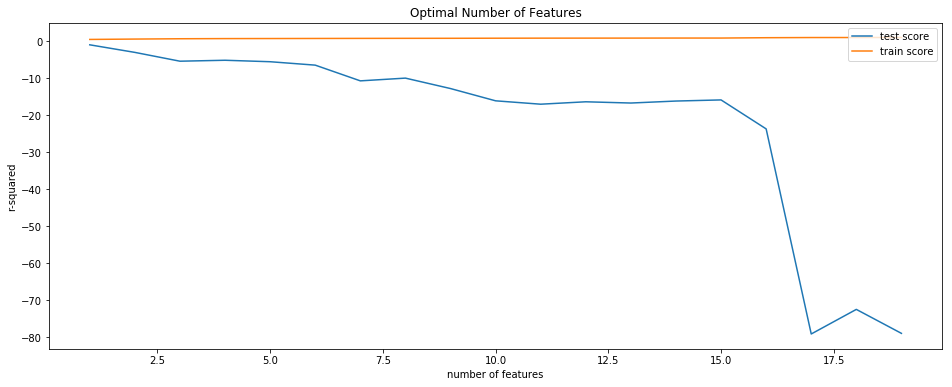

In [44]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [52]:
#10 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(30, 72)
(13, 72)


In [55]:
# Running RFE with the output number of the variable equal to 10
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [56]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('order_week', False, 60),
 ('sla', False, 52),
 ('product_procurement_sla', False, 35),
 ('s1_fact.order_payment_type_Prepaid', False, 42),
 ('product_mrp', False, 61),
 ('sale_price_per_unit', False, 62),
 ('spec_days', False, 24),
 ('NPS', False, 16),
 ('Stock Index', False, 59),
 ('Total Investment', False, 57),
 ('TV', False, 27),
 ('Digital', False, 2),
 ('Sponsorship', False, 28),
 ('Content Marketing', True, 1),
 ('Online marketing', False, 26),
 (' Affiliates', False, 54),
 ('SEM', True, 1),
 ('Radio', False, 22),
 ('Other', False, 19),
 ('product_analytic_vertical_Binoculars', False, 10),
 ('product_analytic_vertical_BoomBox', False, 43),
 ('product_analytic_vertical_CameraAccessory', False, 47),
 ('product_analytic_vertical_CameraBag', False, 33),
 ('product_analytic_vertical_CameraBattery', False, 30),
 ('product_analytic_vertical_CameraBatteryCharger', False, 13),
 ('product_analytic_vertical_CameraBatteryGrip', False, 21),
 ('product_analytic_vertical_CameraEyeCup', Fals

In [57]:
col = x_train.columns[rfe.support_]
col

Index(['Content Marketing', 'SEM', 'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAdapter',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_SoundMixer'],
      dtype='object')

In [58]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [60]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     45.75
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.73e-11
Time:                        18:01:09   Log-Likelihood:                -437.44
No. Observations:                  30   AIC:                             896.9
Df Residuals:                      19   BIC:                             912.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.47
2,SEM,45.03
1,Content Marketing,43.53
4,product_analytic_vertical_GamePad,9.01
3,product_analytic_vertical_CameraTripod,7.85
5,product_analytic_vertical_GamingAdapter,2.39
7,product_analytic_vertical_GamingMouse,2.08
8,product_analytic_vertical_GamingMousePad,1.73
9,product_analytic_vertical_GamingSpeaker,1.50
6,product_analytic_vertical_GamingGun,1.31


###### Makeing a Function to check VIF since it will be used again and again

In [72]:
def checkVIF(dataframe):
    
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [64]:
#Model 2
#dropping SEM due to high P value
x_train_md2 = x_train_rfe.drop(["SEM"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     34.64
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.85e-10
Time:                        18:05:57   Log-Likelihood:                -443.64
No. Observations:                  30   AIC:                             907.3
Df Residuals:                      20   BIC:                             921.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [65]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
0,const,44.34
3,product_analytic_vertical_GamePad,7.38
2,product_analytic_vertical_CameraTripod,7.03
6,product_analytic_vertical_GamingMouse,2.02
4,product_analytic_vertical_GamingAdapter,1.99
1,Content Marketing,1.51
7,product_analytic_vertical_GamingMousePad,1.44
8,product_analytic_vertical_GamingSpeaker,1.34
5,product_analytic_vertical_GamingGun,1.30
9,product_analytic_vertical_SoundMixer,1.24


In [66]:
#Model 3
#dropping product_analytic_vertical_GamePad due to high P value
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_GamePad"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     40.87
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.30e-11
Time:                        18:07:03   Log-Likelihood:                -443.65
No. Observations:                  30   AIC:                             905.3
Df Residuals:                      21   BIC:                             917.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [67]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
0,const,44.33
5,product_analytic_vertical_GamingMouse,2.02
3,product_analytic_vertical_GamingAdapter,1.66
2,product_analytic_vertical_CameraTripod,1.63
1,Content Marketing,1.50
6,product_analytic_vertical_GamingMousePad,1.35
4,product_analytic_vertical_GamingGun,1.29
7,product_analytic_vertical_GamingSpeaker,1.25
8,product_analytic_vertical_SoundMixer,1.24


In [68]:
#Model 4
# Seems VIF for each features is fine
#dropping product_analytic_vertical_SoundMixer due to high P value
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_SoundMixer"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     48.30
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.67e-12
Time:                        18:07:56   Log-Likelihood:                -443.84
No. Observations:                  30   AIC:                             903.7
Df Residuals:                      22   BIC:                             914.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [69]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,36.88
5,product_analytic_vertical_GamingMouse,1.81
3,product_analytic_vertical_GamingAdapter,1.66
1,Content Marketing,1.47
2,product_analytic_vertical_CameraTripod,1.40
6,product_analytic_vertical_GamingMousePad,1.31
4,product_analytic_vertical_GamingGun,1.29
7,product_analytic_vertical_GamingSpeaker,1.25


In [70]:
#Removing SEM and building model due to very high VIF
#Model 5
#dropping product_analytic_vertical_GamingAdapter due to high P value
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_GamingAdapter"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     58.03
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.66e-13
Time:                        18:09:16   Log-Likelihood:                -444.05
No. Observations:                  30   AIC:                             902.1
Df Residuals:                      23   BIC:                             911.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [71]:
checkVIF(x_train_md5)

,Features,VIF
0,const,31.82
4,product_analytic_vertical_GamingMouse,1.53
2,product_analytic_vertical_CameraTripod,1.40
1,Content Marketing,1.39
3,product_analytic_vertical_GamingGun,1.25
5,product_analytic_vertical_GamingMousePad,1.16
6,product_analytic_vertical_GamingSpeaker,1.10


In [74]:
#Model 6
#Removing Content Marketing and building model due to very high P
x_train_md6 = x_train_md5.drop(["Content Marketing"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     69.42
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.77e-13
Time:                        18:11:48   Log-Likelihood:                -444.69
No. Observations:                  30   AIC:                             901.4
Df Residuals:                      24   BIC:                             909.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [75]:
checkVIF(x_train_md6)

,Features,VIF
0,const,26.86
3,product_analytic_vertical_GamingMouse,1.42
1,product_analytic_vertical_CameraTripod,1.39
5,product_analytic_vertical_GamingSpeaker,1.09
4,product_analytic_vertical_GamingMousePad,1.05
2,product_analytic_vertical_GamingGun,1.02


In [76]:
#Model 7
#dropping product_analytic_vertical_GamingSpeaker due to high P value
x_train_md7 = x_train_md6.drop(["product_analytic_vertical_GamingSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
lm7 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     82.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.90e-14
Time:                        18:12:31   Log-Likelihood:                -445.95
No. Observations:                  30   AIC:                             901.9
Df Residuals:                      25   BIC:                             908.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [77]:
checkVIF(x_train_md7)

,Features,VIF
0,const,25.24
3,product_analytic_vertical_GamingMouse,1.36
1,product_analytic_vertical_CameraTripod,1.33
4,product_analytic_vertical_GamingMousePad,1.04
2,product_analytic_vertical_GamingGun,1.01


#### Residual Analysis of the train data

In [78]:
y_train_gmv = lm7.predict(x_train_lm)

Text(0.5,0,'Errors')

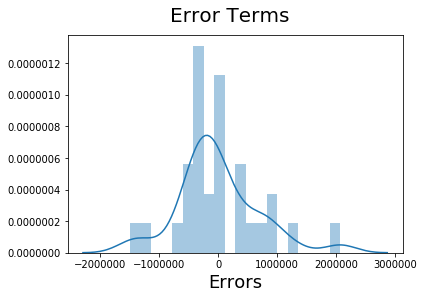

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_gmv), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [80]:
X_test2=X_test[['product_analytic_vertical_CameraTripod','product_analytic_vertical_GamingGun',\
                'product_analytic_vertical_GamingMouse','product_analytic_vertical_GamingMousePad']]
X_test_lm = sm.add_constant(X_test2)

In [86]:
# Making predictions using the Seventh Model
y_pred = lm7.predict(X_test_lm)

Text(0,0.5,'y_pred')

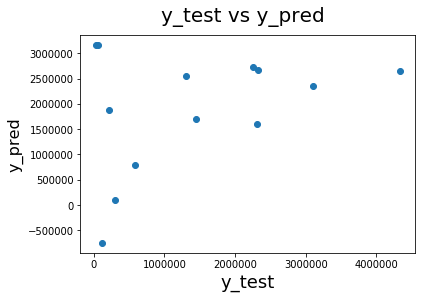

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [89]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

1488603.8990343844

### Multiplicative Model

In [154]:
# taking log of the data
CameraAccessoryWeekly_log=np.log(CameraAccessoryWeekly_f.replace(0,0.0001))

In [155]:
#checking null values
CameraAccessoryWeekly_log.isnull

<bound method DataFrame.isnull of     order_week        gmv       sla  product_procurement_sla  \
0     3.332205  15.049159  1.880443                 1.010431   
1     3.367296  14.903012  1.809244                 1.092605   
2     3.401197  14.189224  1.797640                 1.072910   
3     3.433987  13.283271  1.822658                 1.096506   
4     3.583519  14.693699  1.778651                 0.974211   
5     3.610918  14.907109  1.824175                 0.882983   
6     3.637586  14.810081  1.830713                 0.956271   
7     3.663562  15.224423  1.926155                 0.980769   
8     3.688879  12.896664  1.956674                 1.010879   
9     3.713572  14.228317  1.822966                 0.964444   
10    3.737670  16.538038  1.820568                 1.065953   
11    3.761200  14.425528  1.888315                 1.112818   
12    3.784190  14.578451  1.802632                 0.925951   
13    3.806662  15.157983  1.843484                 0.885882   
14    

In [156]:
CameraAccessoryWeekly_log = CameraAccessoryWeekly_log.fillna(0)

In [157]:
CameraAccessoryWeekly_log

,order_week,gmv,sla,product_procurement_sla,s1_fact.order_payment_type_Prepaid,product_mrp,sale_price_per_unit,spec_days,NPS,Stock Index,...,product_analytic_vertical_VoiceRecorder,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,3.332205,15.049159,1.880443,1.010431,-1.196403,8.153833,7.621275,-9.210340,0.566039,3.636737,...,-9.210340,3.212187,2.730029,3.000720,-1.261131,0.868500,1.485385,-9.210340,1.485385,-9.210340
1,3.367296,14.903012,1.809244,1.092605,-1.240733,7.807337,7.182703,-1.287854,0.566039,3.636737,...,-9.210340,3.358638,2.866951,3.143434,-9.210340,1.645448,0.336472,-9.210340,0.336472,-9.210340
2,3.401197,14.189224,1.797640,1.072910,-1.173847,7.713821,7.325275,-9.210340,0.566039,3.636737,...,-3.481240,3.392829,2.809403,3.138100,-9.210340,1.621366,-0.105361,-9.210340,-0.105361,-9.210340
3,3.433987,13.283271,1.822658,1.096506,-1.234687,7.883541,7.213938,-9.210340,0.566039,3.636737,...,-9.210340,3.452630,2.862201,3.201391,-9.210340,1.882006,1.533277,-9.210340,1.533277,-9.210340
4,3.583519,14.693699,1.778651,0.974211,-1.393824,7.692893,7.139030,-9.210340,0.447362,3.602777,...,-9.210340,3.414991,2.928524,3.197039,-9.210340,1.865629,2.312535,-9.210340,2.312535,-9.210340
5,3.610918,14.907109,1.824175,0.882983,-1.438187,7.309112,6.854218,-9.210340,0.447362,3.602777,...,-9.210340,3.157000,2.701361,2.956991,0.246860,0.924259,-0.040822,-9.210340,-0.040822,-9.210340
6,3.637586,14.810081,1.830713,0.956271,-1.291758,7.963932,7.514921,-9.210340,0.447362,3.602777,...,-9.210340,3.208825,2.788093,3.022861,-9.210340,0.936093,-0.597837,-9.210340,-0.597837,-9.210340
7,3.663562,15.224423,1.926155,0.980769,-1.427250,7.917025,7.437432,-9.210340,0.447362,3.602777,...,-3.016934,3.258097,2.674149,2.995732,-9.210340,0.693147,-9.210340,-9.210340,-9.210340,-9.210340
8,3.688879,12.896664,1.956674,1.010879,-1.647204,7.488307,7.020153,-9.210340,0.359216,3.664388,...,-9.210340,2.980619,2.647946,2.874976,0.654926,0.500775,1.313724,-9.210340,1.313724,-9.210340
9,3.713572,14.228317,1.822966,0.964444,-1.620405,7.958109,7.326319,-9.210340,0.359216,3.664388,...,-3.349904,3.054001,2.484907,2.810607,0.322083,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340


In [158]:
# import Scaling the data
scaler = StandardScaler()
scaler.fit(CameraAccessoryWeekly_log)
# divide data into train and test
df_train,df_test = train_test_split(CameraAccessoryWeekly_log,train_size=0.7,test_size=0.3,random_state=True)

In [159]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

In [160]:
len(X_train.columns)
X_train.shape

(30, 72)

In [161]:
# doing cv on log data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

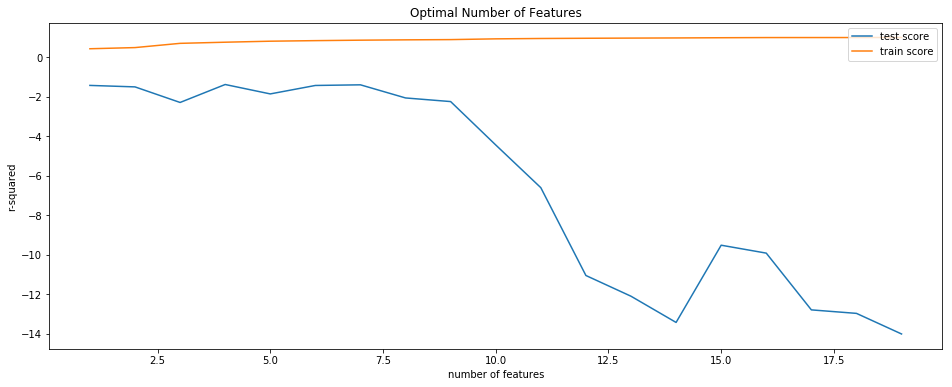

In [162]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [163]:
# Again 10 features seems good
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]

In [164]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [165]:
col

Index(['sale_price_per_unit', 'SEM', 'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_CoolingPad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_TVOutCableAccessory'],
      dtype='object')

In [166]:
# Creating First multiplicative model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     17.93
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.24e-07
Time:                        19:37:50   Log-Likelihood:                -10.343
No. Observations:                  30   AIC:                             42.69
Df Residuals:                      19   BIC:                             58.10
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [167]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
0,const,1382.11
3,product_analytic_vertical_CameraBattery,1040.68
4,product_analytic_vertical_CameraTripod,1007.79
10,product_analytic_vertical_TVOutCableAccessory,5.36
7,product_analytic_vertical_GamingMouse,5.31
8,product_analytic_vertical_GamingMousePad,2.64
5,product_analytic_vertical_CoolingPad,2.44
1,sale_price_per_unit,1.78
6,product_analytic_vertical_GamingAccessoryKit,1.73
9,product_analytic_vertical_SlingBox,1.69


In [168]:
#Multiplicative Model 2
# Removing product_analytic_vertical_CameraBattery since it has high p and high VIF
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_CameraBattery"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     19.12
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.80e-08
Time:                        19:40:34   Log-Likelihood:                -11.595
No. Observations:                  30   AIC:                             43.19
Df Residuals:                      20   BIC:                             57.20
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [169]:
checkVIF(x_train_md2)

,Features,VIF
0,const,1369.45
3,product_analytic_vertical_CameraTripod,4.19
6,product_analytic_vertical_GamingMouse,3.98
9,product_analytic_vertical_TVOutCableAccessory,3.51
7,product_analytic_vertical_GamingMousePad,2.62
4,product_analytic_vertical_CoolingPad,1.82
5,product_analytic_vertical_GamingAccessoryKit,1.73
8,product_analytic_vertical_SlingBox,1.69
2,SEM,1.56
1,sale_price_per_unit,1.44


In [170]:
#Multiplicative Model 3
# Removing product_analytic_vertical_CameraMicrophone since it has high p and high VIF
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_TVOutCableAccessory"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     22.57
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.16e-08
Time:                        19:41:31   Log-Likelihood:                -11.599
No. Observations:                  30   AIC:                             41.20
Df Residuals:                      21   BIC:                             53.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [171]:
checkVIF(x_train_md3)

,Features,VIF
0,const,1082.90
3,product_analytic_vertical_CameraTripod,3.47
6,product_analytic_vertical_GamingMouse,3.06
7,product_analytic_vertical_GamingMousePad,1.71
8,product_analytic_vertical_SlingBox,1.58
5,product_analytic_vertical_GamingAccessoryKit,1.55
2,SEM,1.36
4,product_analytic_vertical_CoolingPad,1.36
1,sale_price_per_unit,1.34


In [172]:
#Multiplicative Model 4
# Removing product_analytic_vertical_CoolingPad  since it has high p 
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_CoolingPad"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     20.28
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.18e-08
Time:                        19:42:28   Log-Likelihood:                -15.394
No. Observations:                  30   AIC:                             46.79
Df Residuals:                      22   BIC:                             58.00
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [173]:
# Calculate the VIFs for the new model
checkVIF(x_train_md4)

,Features,VIF
0,const,1016.35
3,product_analytic_vertical_CameraTripod,3.19
5,product_analytic_vertical_GamingMouse,3.06
6,product_analytic_vertical_GamingMousePad,1.64
7,product_analytic_vertical_SlingBox,1.50
4,product_analytic_vertical_GamingAccessoryKit,1.37
1,sale_price_per_unit,1.34
2,SEM,1.32


##### Now all vif seems fine. but product_analytic_vertical_GamingChargingStation has the high p value. lets remove it and make  new model

In [174]:
#Multiplicative Model 5
# Removing product_analytic_vertical_GamingChargingStation since it has high p and high VIF
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_SlingBox"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     24.65
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.25e-09
Time:                        19:42:57   Log-Likelihood:                -15.443
No. Observations:                  30   AIC:                             44.89
Df Residuals:                      23   BIC:                             54.69
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [175]:
# Calculate the VIFs for the new model
checkVIF(x_train_md5)

,Features,VIF
0,const,806.55
3,product_analytic_vertical_CameraTripod,3.06
5,product_analytic_vertical_GamingMouse,2.86
6,product_analytic_vertical_GamingMousePad,1.36
1,sale_price_per_unit,1.30
4,product_analytic_vertical_GamingAccessoryKit,1.30
2,SEM,1.17


In [180]:
# Still product_analytic_vertical_ExtensionTube has the high P value.. let make another model by removing it
#Multiplicative Model 6
# Removing product_analytic_vertical_ExtensionTube since it has high p and high VIF
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_CameraTripod"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
mm6 = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(mm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     30.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.12e-09
Time:                        19:48:05   Log-Likelihood:                -15.525
No. Observations:                  30   AIC:                             43.05
Df Residuals:                      24   BIC:                             51.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [178]:
# Calculate the VIFs for the new model
checkVIF(x_train_md6)

,Features,VIF
0,const,691.55
5,product_analytic_vertical_GamingMousePad,1.36
1,sale_price_per_unit,1.30
4,product_analytic_vertical_GamingMouse,1.27
2,SEM,1.13
3,product_analytic_vertical_GamingAccessoryKit,1.04


In [ ]:
#Model & seems correct one.. its p values, vif and r square is accepatble

### Model Evaluation of Multiplicative Model

Text(0,0.5,'y_pred')

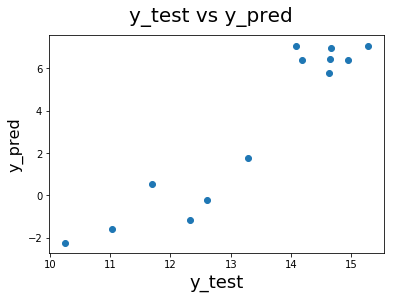

In [181]:
X_test2=X_test[['product_analytic_vertical_GamingMousePad','sale_price_per_unit',\
                'product_analytic_vertical_GamingMouse','SEM','product_analytic_vertical_GamingAccessoryKit']]
X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = mm6.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  



In [183]:
#RMSE calculation test data
math.sqrt(np.mean(np.square((y_pred-y_test))))

10.275934076825639

In [184]:
np.exp(math.sqrt(np.mean(np.square((y_pred-y_test)))))

29025.617375849182

### Koyck Model

In [119]:
#making klag df from original df
CameraAccessoryWeekly_klag=CameraAccessoryWeekly

In [121]:
CameraAccessoryWeekly_klag['gmv_prev']=CameraAccessoryWeekly_klag.gmv.shift(1)

In [532]:
#Checking values
CameraAccessoryWeekly_klag[['gmv','gmv_prev']]
#CameraAccessoryWeekly_klag.fillna(0)

,gmv,gmv_prev
0,3.433734e+06,NaN
1,2.966853e+06,3.433734e+06
2,1.453121e+06,2.966853e+06
3,5.872880e+05,1.453121e+06
4,2.406536e+06,5.872880e+05
5,2.979032e+06,2.406536e+06
6,2.703564e+06,2.979032e+06
7,4.091502e+06,2.703564e+06
8,3.989790e+05,4.091502e+06
9,1.511053e+06,3.989790e+05


In [123]:
CameraAccessoryWeekly_kf=CameraAccessoryWeekly_klag.dropna()

In [124]:
CameraAccessoryWeekly_kf.shape

(42, 74)

In [126]:
# scaling df
scaler = StandardScaler()
scaler.fit(CameraAccessoryWeekly_kf)
# divide data into train and test
df_train,df_test = train_test_split(CameraAccessoryWeekly_f,train_size=0.7,test_size=0.3,random_state=True)

In [127]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

# number of features in X_train
len(X_train.columns)

72

In [128]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

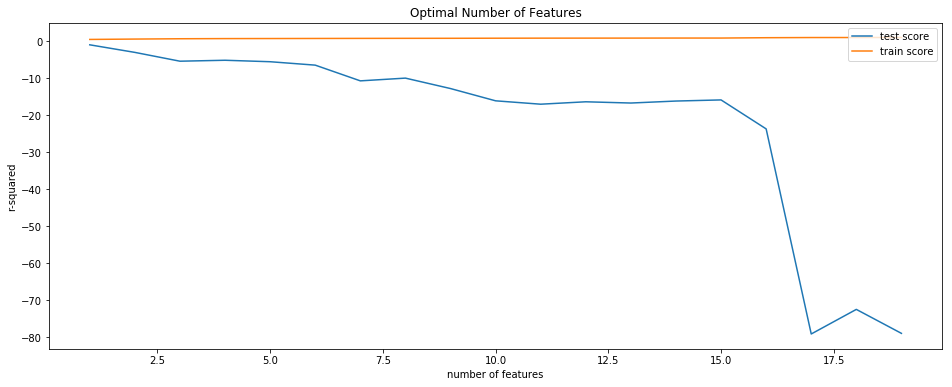

In [129]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [130]:
#10 seems optimal no of features 
print(df_train.shape)
print(df_test.shape)

(30, 72)
(13, 72)


##### Making first Koyck Model

In [133]:
# Running RFE with the optimum number of the variable equal to 10
x_train=X_train
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
col = x_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     57.00
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.77e-12
Time:                        19:24:44   Log-Likelihood:                -444.55
No. Observations:                  30   AIC:                             909.1
Df Residuals:                      20   BIC:                             923.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [134]:
# Calculate the VIFs for the new model
checkVIF(x_train_rfe)

,Features,VIF
1,SEM,81.94
0,Content Marketing,68.13
3,product_analytic_vertical_GamePad,60.08
2,product_analytic_vertical_CameraTripod,57.82
4,product_analytic_vertical_GamingAdapter,7.28
7,product_analytic_vertical_GamingMousePad,5.62
6,product_analytic_vertical_GamingMouse,3.66
8,product_analytic_vertical_GamingSpeaker,1.55
5,product_analytic_vertical_GamingGun,1.32
9,product_analytic_vertical_SoundMixer,1.10


In [135]:
#koyck Model 2
# Removing product_analytic_vertical_GamePad since it has high p and high VIF
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_GamePad"], axis = 1) 
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     49.86
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.53e-12
Time:                        19:26:22   Log-Likelihood:                -438.45
No. Observations:                  30   AIC:                             896.9
Df Residuals:                      20   BIC:                             910.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [136]:
# Calculate the VIFs for the new model
checkVIF(x_train_md2)

,Features,VIF
1,SEM,68.30
0,Content Marketing,56.57
2,product_analytic_vertical_CameraTripod,5.45
3,product_analytic_vertical_GamingAdapter,5.19
6,product_analytic_vertical_GamingMousePad,4.91
5,product_analytic_vertical_GamingMouse,3.49
7,product_analytic_vertical_GamingSpeaker,1.52
4,product_analytic_vertical_GamingGun,1.31
8,product_analytic_vertical_SoundMixer,1.10


In [137]:
#koyck Model 3
# Removing SEM since it has high p and high VIF
x_train_md3 = x_train_md2.drop(["SEM"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     40.87
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.30e-11
Time:                        19:26:55   Log-Likelihood:                -443.65
No. Observations:                  30   AIC:                             905.3
Df Residuals:                      21   BIC:                             917.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [138]:
# Calculate the VIFs for the new model
checkVIF(x_train_md3)

,Features,VIF
1,product_analytic_vertical_CameraTripod,5.38
5,product_analytic_vertical_GamingMousePad,4.67
2,product_analytic_vertical_GamingAdapter,4.61
4,product_analytic_vertical_GamingMouse,2.37
0,Content Marketing,1.94
6,product_analytic_vertical_GamingSpeaker,1.35
3,product_analytic_vertical_GamingGun,1.31
7,product_analytic_vertical_SoundMixer,1.09


In [139]:
#koyck Model 4
# Removing product_analytic_vertical_SoundMixer since it has high VIF
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_SoundMixer"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     48.30
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.67e-12
Time:                        19:27:31   Log-Likelihood:                -443.84
No. Observations:                  30   AIC:                             903.7
Df Residuals:                      22   BIC:                             914.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [140]:
checkVIF(x_train_md4)

,Features,VIF
1,product_analytic_vertical_CameraTripod,5.32
5,product_analytic_vertical_GamingMousePad,4.66
2,product_analytic_vertical_GamingAdapter,4.46
4,product_analytic_vertical_GamingMouse,2.37
0,Content Marketing,1.93
3,product_analytic_vertical_GamingGun,1.31
6,product_analytic_vertical_GamingSpeaker,1.29


In [141]:
#koyck Model 5
# Removing product_analytic_vertical_CameraTripod since it has high VIF
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_CameraTripod"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     50.39
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.32e-12
Time:                        19:28:07   Log-Likelihood:                -446.03
No. Observations:                  30   AIC:                             906.1
Df Residuals:                      23   BIC:                             915.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [142]:
checkVIF(x_train_md5)

,Features,VIF
4,product_analytic_vertical_GamingMousePad,4.54
1,product_analytic_vertical_GamingAdapter,3.30
3,product_analytic_vertical_GamingMouse,2.12
0,Content Marketing,1.61
5,product_analytic_vertical_GamingSpeaker,1.27
2,product_analytic_vertical_GamingGun,1.25


In [143]:
#koyck Model 6
# Removing product_analytic_vertical_CameraTripod since it has high VIF
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_GamingAdapter"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     61.88
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.34e-13
Time:                        19:28:22   Log-Likelihood:                -446.30
No. Observations:                  30   AIC:                             904.6
Df Residuals:                      24   BIC:                             913.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [145]:
checkVIF(x_train_md6)

,Features,VIF
3,product_analytic_vertical_GamingMousePad,2.34
2,product_analytic_vertical_GamingMouse,2.12
0,Content Marketing,1.56
1,product_analytic_vertical_GamingGun,1.24
4,product_analytic_vertical_GamingSpeaker,1.22


In [146]:
#koyck Model 7
# Removing Content Marketing since it has high p
x_train_md7 = x_train_md6.drop(["Content Marketing"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md7)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     78.23
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.19e-14
Time:                        19:29:01   Log-Likelihood:                -446.71
No. Observations:                  30   AIC:                             903.4
Df Residuals:                      25   BIC:                             910.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [147]:
checkVIF(x_train_md7)

,Features,VIF
2,product_analytic_vertical_GamingMousePad,2.29
1,product_analytic_vertical_GamingMouse,2.00
3,product_analytic_vertical_GamingSpeaker,1.22
0,product_analytic_vertical_GamingGun,1.05


In [148]:
#koyck Model 7
# Removing Content product_analytic_vertical_GamingSpeaker since it has high p
x_train_md8 = x_train_md7.drop(["product_analytic_vertical_GamingSpeaker"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md8)
koyckModel = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our koyck model
print(koyckModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     95.29
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.77e-14
Time:                        19:29:17   Log-Likelihood:                -448.50
No. Observations:                  30   AIC:                             905.0
Df Residuals:                      26   BIC:                             910.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [149]:
checkVIF(x_train_md8)

,Features,VIF
2,product_analytic_vertical_GamingMousePad,2.04
1,product_analytic_vertical_GamingMouse,2.00
0,product_analytic_vertical_GamingGun,1.04


### Koyck Model Evaluation

Text(0,0.5,'y_pred')

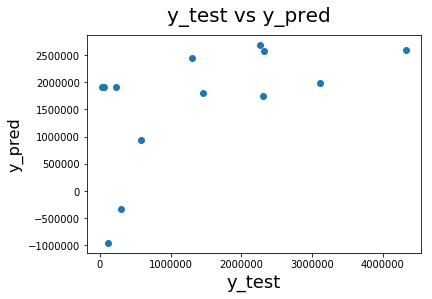

In [150]:
X_test2=X_test[['product_analytic_vertical_GamingGun','product_analytic_vertical_GamingMouse',\
                'product_analytic_vertical_GamingMousePad']]

X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = koyckModel.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


In [153]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)/10000))))

116.85192909122951

#### Distributed lag model

In [189]:
def constants(df):
    new_columns = ["{}_Int".format(variable) for variable in df.columns]
    return pd.DataFrame(np.ones_like(df.loc[:,:]), index=df.index, columns=new_columns)

def lag(df, n):
    new_columns = ["{}_Lag{:02d}".format(variable, n) for variable in df.columns]
    new_df = df.shift(n)
    new_df.columns = new_columns
    return new_df

In [190]:
CameraAccessoryWeekly_lag=lag(CameraAccessoryWeekly,1)

In [191]:
CameraAccessoryWeekly_lag.head()

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,3433734.0,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,NaN
2,29.0,2966853.0,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,3433734.0
3,30.0,1453121.0,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.0,0.900000,0.0,2966853.0
4,31.0,587288.0,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,1453121.0


In [192]:
CameraAccessoryWeekly_lag = CameraAccessoryWeekly_lag.fillna(0)

In [193]:
CameraAccessoryWeekly_lag

,order_week_Lag01,gmv_Lag01,sla_Lag01,product_procurement_sla_Lag01,s1_fact.order_payment_type_Prepaid_Lag01,product_mrp_Lag01,sale_price_per_unit_Lag01,spec_days_Lag01,NPS_Lag01,Stock Index_Lag01,...,Max Temp (°C)_Lag01,Min Temp (°C)_Lag01,Mean Temp (°C)_Lag01,Heat Deg Days (°C)_Lag01,Cool Deg Days (°C)_Lag01,Total Rain (mm)_Lag01,Total Snow (cm)_Lag01,Total Precip (mm)_Lag01,Snow on Grnd (cm)_Lag01,gmv_prev_Lag01
0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,28.0,3.433734e+06,6.556407,2.746784,0.302280,3476.680723,2041.163164,0.000000,1.761277,37.967742,...,24.833333,15.333333,20.100000,0.283333,2.383333,4.416667,0.000000,4.416667,0.000000,0.000000e+00
2,29.0,2.966853e+06,6.105828,2.982032,0.289172,2458.574651,1316.461569,0.275862,1.761277,37.967742,...,28.750000,17.583333,23.183333,0.000000,5.183333,1.400000,0.000000,1.400000,0.000000,3.433734e+06
3,30.0,1.453121e+06,6.035386,2.923874,0.309175,2239.081762,1518.190844,0.000000,1.761277,37.967742,...,29.750000,16.600000,23.060000,0.000000,5.060000,0.900000,0.000000,0.900000,0.000000,2.966853e+06
4,31.0,5.872880e+05,6.188282,2.993687,0.290926,2653.250466,1358.231123,0.000000,1.761277,37.967742,...,31.583333,17.500000,24.566667,0.000000,6.566667,4.633333,0.000000,4.633333,0.000000,1.453121e+06
5,36.0,2.406536e+06,5.921864,2.649075,0.248125,2192.709758,1260.205177,0.000000,1.564181,36.700000,...,30.416667,18.700000,24.460000,0.000000,6.460000,10.100000,0.000000,10.100000,0.000000,5.872880e+05
6,37.0,2.979032e+06,6.197678,2.418103,0.237358,1493.849331,947.871066,0.000000,1.564181,36.700000,...,23.500000,14.900000,19.240000,1.280000,2.520000,0.960000,0.000000,0.960000,0.000000,2.406536e+06
7,38.0,2.703564e+06,6.238333,2.601976,0.274787,2875.356259,1835.222885,0.000000,1.564181,36.700000,...,24.750000,16.250000,20.550000,0.000000,2.550000,0.550000,0.000000,0.550000,0.000000,2.979032e+06
8,39.0,4.091502e+06,6.863068,2.666505,0.239968,2743.597606,1698.383449,0.000000,1.564181,36.700000,...,26.000000,14.500000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.703564e+06
9,40.0,3.989790e+05,7.075754,2.748015,0.192588,1787.023650,1118.957815,0.000000,1.432206,39.032258,...,19.700000,14.125000,17.725000,1.925000,1.650000,3.720000,0.000000,3.720000,0.000000,4.091502e+06


In [194]:
# Scale the data
scaler = StandardScaler()
scaler.fit(CameraAccessoryWeekly_lag)
# divide data into train and test
df_train,df_test = train_test_split(CameraAccessoryWeekly_lag,train_size=0.7,test_size=0.3,random_state=True)

In [195]:
# using Grid search CV to find optimal no of features
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('gmv_Lag01')
X_train = df_train

y_test = df_test.pop('gmv_Lag01')
X_test = df_test

# number of features in X_train
len(X_train.columns)

73

In [196]:
# doing cv on lag data
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

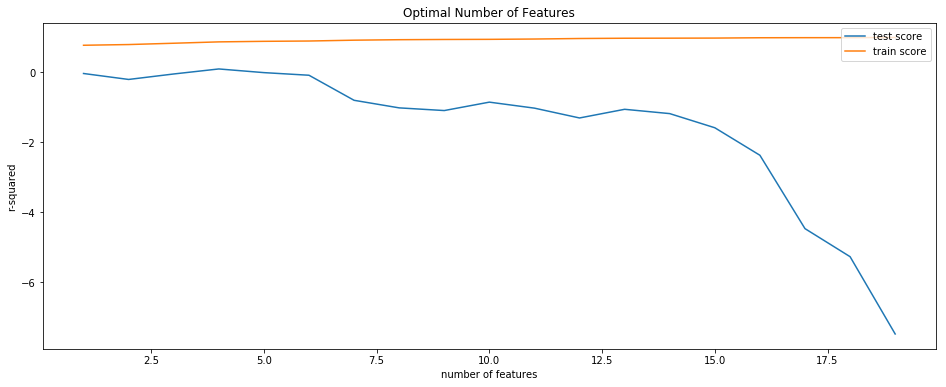

In [197]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [198]:
# Again 10 features seems good
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

In [199]:
x_train_rfe = X_train[col]

In [201]:
# Creating First lag model
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     39.76
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.31e-13
Time:                        20:04:34   Log-Likelihood:                -546.88
No. Observations:                  37   AIC:                             1116.
Df Residuals:                      26   BIC:                             1133.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [202]:
checkVIF(x_train_rfe)

,Features,VIF
5,product_analytic_vertical_ExtensionTube_Lag01,4.68
0,const,3.52
7,product_analytic_vertical_GamingAccessoryKit_L...,2.92
2,product_analytic_vertical_CameraMicrophone_Lag01,2.43
3,product_analytic_vertical_CameraRemoteControl_...,2.28
4,product_analytic_vertical_DockingStation_Lag01,2.27
6,product_analytic_vertical_FMRadio_Lag01,2.04
1,product_analytic_vertical_BoomBox_Lag01,1.82
9,product_analytic_vertical_JoystickGamingWheel_...,1.36
10,product_analytic_vertical_VoiceRecorder_Lag01,1.36


In [204]:
#Distributed Lag model 2
# Removing product_analytic_vertical_DockingStation_Lag01 since it has high p 
     
x_train_md2 = x_train_rfe.drop(["product_analytic_vertical_DockingStation_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     43.88
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.15e-14
Time:                        20:07:45   Log-Likelihood:                -547.65
No. Observations:                  37   AIC:                             1115.
Df Residuals:                      27   BIC:                             1131.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [205]:
checkVIF(x_train_md2)

,Features,VIF
0,const,3.47
4,product_analytic_vertical_ExtensionTube_Lag01,3.41
6,product_analytic_vertical_GamingAccessoryKit_L...,2.77
2,product_analytic_vertical_CameraMicrophone_Lag01,2.32
3,product_analytic_vertical_CameraRemoteControl_...,2.23
5,product_analytic_vertical_FMRadio_Lag01,1.86
1,product_analytic_vertical_BoomBox_Lag01,1.81
8,product_analytic_vertical_JoystickGamingWheel_...,1.36
9,product_analytic_vertical_VoiceRecorder_Lag01,1.35
7,product_analytic_vertical_GamingGun_Lag01,1.13


In [206]:
#Lag Model 3
# Removing product_analytic_vertical_GamingAccessoryKit_Lag01   since it has high p 
x_train_md3 = x_train_md2.drop(["product_analytic_vertical_GamingAccessoryKit_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md3)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     49.23
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.81e-14
Time:                        20:09:57   Log-Likelihood:                -548.32
No. Observations:                  37   AIC:                             1115.
Df Residuals:                      28   BIC:                             1129.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [207]:
checkVIF(x_train_md3)

,Features,VIF
4,product_analytic_vertical_ExtensionTube_Lag01,3.40
0,const,3.26
2,product_analytic_vertical_CameraMicrophone_Lag01,2.30
1,product_analytic_vertical_BoomBox_Lag01,1.75
5,product_analytic_vertical_FMRadio_Lag01,1.61
3,product_analytic_vertical_CameraRemoteControl_...,1.53
8,product_analytic_vertical_VoiceRecorder_Lag01,1.33
7,product_analytic_vertical_JoystickGamingWheel_...,1.14
6,product_analytic_vertical_GamingGun_Lag01,1.10


In [208]:
#MLag Model 4
# Removing product_analytic_vertical_CameraMicrophone_Lag01 since it has high p 
x_train_md4 = x_train_md3.drop(["product_analytic_vertical_CameraMicrophone_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md4)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     53.39
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.26e-15
Time:                        20:12:06   Log-Likelihood:                -549.83
No. Observations:                  37   AIC:                             1116.
Df Residuals:                      29   BIC:                             1129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [210]:
checkVIF(x_train_md4)

,Features,VIF
0,const,3.26
1,product_analytic_vertical_BoomBox_Lag01,1.60
4,product_analytic_vertical_FMRadio_Lag01,1.59
3,product_analytic_vertical_ExtensionTube_Lag01,1.58
2,product_analytic_vertical_CameraRemoteControl_...,1.53
7,product_analytic_vertical_VoiceRecorder_Lag01,1.14
6,product_analytic_vertical_JoystickGamingWheel_...,1.12
5,product_analytic_vertical_GamingGun_Lag01,1.10


In [211]:
#Lag Model 5
# Removing product_analytic_vertical_ExtensionTube_Lag01 since it has high p 
x_train_md5 = x_train_md4.drop(["product_analytic_vertical_ExtensionTube_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md5)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     61.84
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.51e-15
Time:                        20:13:48   Log-Likelihood:                -550.54
No. Observations:                  37   AIC:                             1115.
Df Residuals:                      30   BIC:                             1126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [212]:
checkVIF(x_train_md5)

,Features,VIF
0,const,3.25
3,product_analytic_vertical_FMRadio_Lag01,1.58
2,product_analytic_vertical_CameraRemoteControl_...,1.53
5,product_analytic_vertical_JoystickGamingWheel_...,1.12
1,product_analytic_vertical_BoomBox_Lag01,1.11
4,product_analytic_vertical_GamingGun_Lag01,1.10
6,product_analytic_vertical_VoiceRecorder_Lag01,1.07


In [215]:
#Lag Model 6
# Removing product_analytic_vertical_FMRadio_Lag01 since it has high p 
x_train_md6 = x_train_md5.drop(["product_analytic_vertical_FMRadio_Lag01"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_md6)
dl = sm.OLS(y_train,x_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              gmv_Lag01   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     68.12
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.69e-16
Time:                        20:20:56   Log-Likelihood:                -552.55
No. Observations:                  37   AIC:                             1117.
Df Residuals:                      31   BIC:                             1127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [214]:
checkVIF(x_train_md6)

,Features,VIF
0,const,3.14
2,product_analytic_vertical_CameraRemoteControl_...,1.13
4,product_analytic_vertical_JoystickGamingWheel_...,1.11
3,product_analytic_vertical_GamingGun_Lag01,1.08
1,product_analytic_vertical_BoomBox_Lag01,1.06
5,product_analytic_vertical_VoiceRecorder_Lag01,1.03


### Model Evaluation

Text(0,0.5,'y_pred')

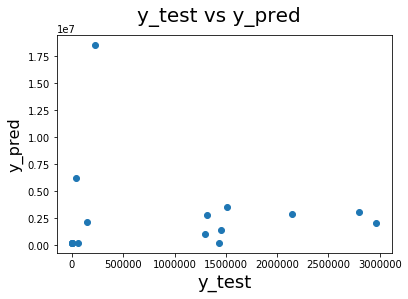

In [216]:
X_test2=X_test[['product_analytic_vertical_BoomBox_Lag01','product_analytic_vertical_CameraRemoteControl_Lag01',\
                'product_analytic_vertical_GamingGun_Lag01','product_analytic_vertical_JoystickGamingWheel_Lag01',\
               'product_analytic_vertical_VoiceRecorder_Lag01']]

X_test_lm = sm.add_constant(X_test2)

# Making predictions using the Seventh Model
y_pred = dl.predict(X_test_lm)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [221]:
#RMSE calculation test data
math.sqrt(np.mean(np.square(((y_pred-y_test)))))

4919576.356822952